In [159]:
import pandas as pd
import numpy as np
%matplotlib inline
import turicreate as tc
import matplotlib.pyplot as plt

In [160]:
plt.style.use('seaborn')

In [163]:
dataset =  '~/Desktop/HackAI/eric-house-process.csv'
columns_used = ['time', 'energy']

In [191]:
df_uci = pd.read_csv(dataset)
df_uci['time'] = pd.to_datetime(df_uci['time'])
df_uci.set_index('time', inplace= True)

df_minmax = df_uci.copy()
df_minmax['min'] = df_minmax.energy[(df_minmax.energy.shift(1) > df_minmax.energy) & (df_minmax.energy.shift(-1) > df_minmax.energy)]
df_minmax['max'] = df_minmax.energy[(df_minmax.energy.shift(1) < df_minmax.energy) & (df_minmax.energy.shift(-1) < df_minmax.energy)]
df_minmax

,energy,min,max
time,,,
2016-07-31 09:00:00-05:00,8905.629900,NaN,NaN
2016-07-31 10:00:00-05:00,8911.552770,NaN,8911.55277
2016-07-31 11:00:00-05:00,7987.723471,NaN,NaN
2016-07-31 12:00:00-05:00,6201.645440,6201.64544,NaN
2016-07-31 13:00:00-05:00,10864.618100,NaN,NaN
...,...,...,...
2016-08-05 10:00:00-05:00,5671.331604,NaN,NaN
2016-08-05 11:00:00-05:00,9695.338903,NaN,NaN
2016-08-05 12:00:00-05:00,11892.227850,NaN,NaN


In [184]:
df_uci

,energy
time,
2016-07-31 09:00:00-05:00,8905.629900
2016-07-31 10:00:00-05:00,8911.552770
2016-07-31 11:00:00-05:00,7987.723471
2016-07-31 12:00:00-05:00,6201.645440
2016-07-31 13:00:00-05:00,10864.618100
...,...
2016-08-05 10:00:00-05:00,5671.331604
2016-08-05 11:00:00-05:00,9695.338903
2016-08-05 12:00:00-05:00,11892.227850


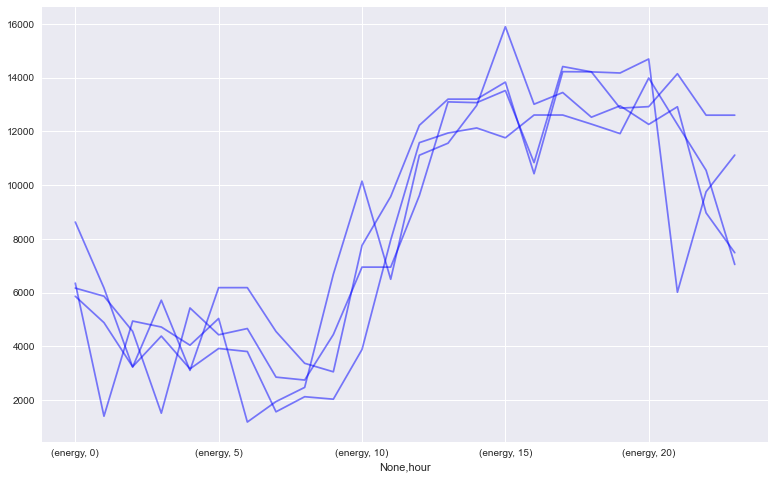

In [187]:
df_uci = df_uci.replace('?', np.nan)
df_uci = df_uci.astype(np.float).fillna(method='bfill')

df_uci_hourly = df_uci.resample('H').sum()
df_uci_hourly['hour'] = df_uci_hourly.index.hour
df_uci_hourly.index = df_uci_hourly.index.date

df_uci_pivot = df_uci_hourly.pivot(columns='hour')
df_uci_pivot = df_uci_pivot.dropna()

df_uci_pivot.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.50)

In [279]:
dataset_mean = df_uci.mean()
print(dataset_mean)

energy    8463.228763
dtype: float64


In [283]:
energy_list = []
energy_list = (df_uci['energy']).tolist()
#print(energy_list)

for i in range(len(energy_list)):
    if (energy_list[i] > dataset_mean).bool():
        print(f'High energy usage at hour {i}')
    elif (energy_list[i] < dataset_mean).bool():
        print(f'Lower energy usage than usual at hour {i}. Great job!')
    else:
        print(f'Normal usage at hour {i}. Keep up the good work.')

High energy usage at hour 0
High energy usage at hour 1
Lower energy usage than usual at hour 2. Great job!
Lower energy usage than usual at hour 3. Great job!
High energy usage at hour 4
High energy usage at hour 5
High energy usage at hour 6
High energy usage at hour 7
High energy usage at hour 8
High energy usage at hour 9
High energy usage at hour 10
High energy usage at hour 11
High energy usage at hour 12
High energy usage at hour 13
Lower energy usage than usual at hour 14. Great job!
Lower energy usage than usual at hour 15. Great job!
Lower energy usage than usual at hour 16. Great job!
Lower energy usage than usual at hour 17. Great job!
Lower energy usage than usual at hour 18. Great job!
Lower energy usage than usual at hour 19. Great job!
Lower energy usage than usual at hour 20. Great job!
Lower energy usage than usual at hour 21. Great job!
Lower energy usage than usual at hour 22. Great job!
Lower energy usage than usual at hour 23. Great job!
Lower energy usage than us